### Perceptron trick

In [20]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant = 0 , n_classes=2, n_clusters_per_class =1 ,  random_state=41,hypercube=False,class_sep=10)

In [21]:
import matplotlib.pyplot as plt

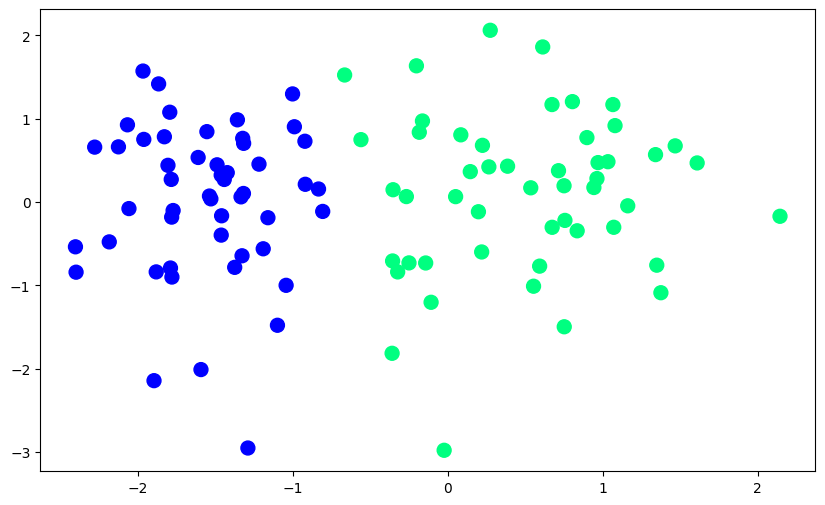

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [23]:
def perceptron(X,y):

    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for j in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]



In [24]:
def step(z):
    return 1 if z>0 else 0

In [25]:
intercept_,coef_=perceptron(X,y)

In [26]:
print(coef_)
print(intercept_)

[1.36273644 0.10499565]
0.9


In [27]:
m= - (coef_[0]/coef_[1])
b= - (intercept_/coef_[1])

In [28]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input + b

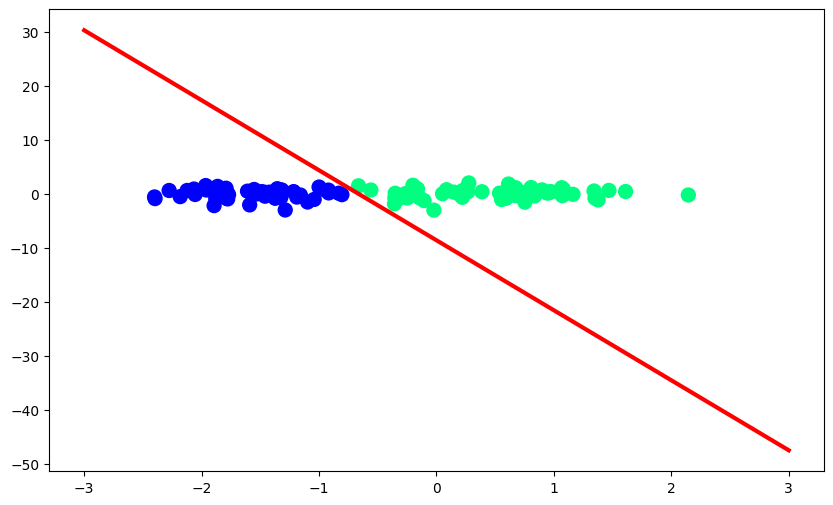

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()


### Perceptron Loss Function

In [30]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [31]:
X.shape

(100, 2)

In [32]:
y.shape

(100,)

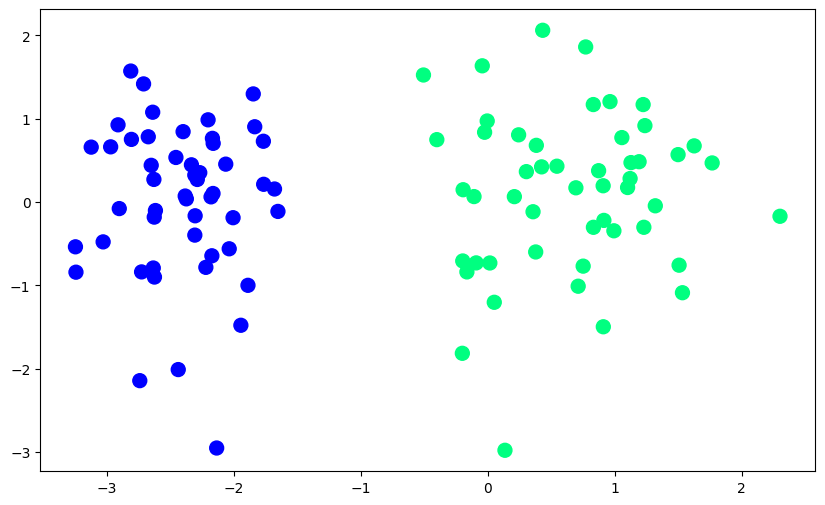

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [34]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [35]:

w1,w2,b = perceptron(X,y)

In [36]:
b

np.float64(1.3000000000000003)

In [37]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

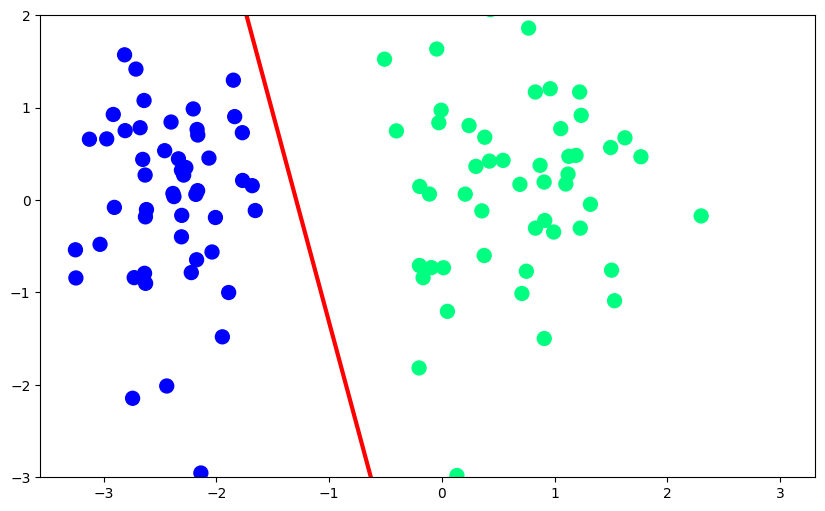

In [38]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Problem with Perceptron

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [41]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

In [42]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

In [56]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [44]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

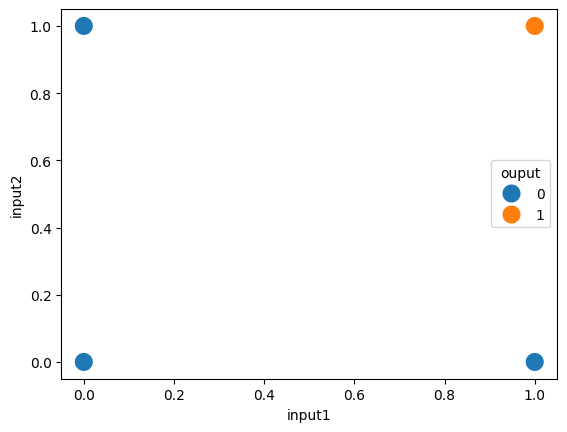

In [63]:
sns.scatterplot(x=and_data['input1'], y=and_data['input2'], hue=and_data['ouput'],s=200)

In [48]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

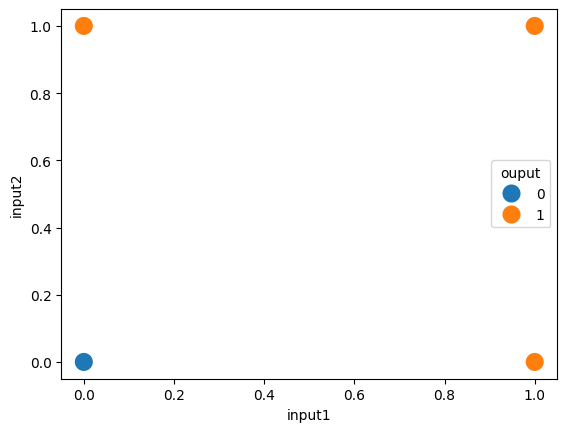

In [64]:
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

<Axes: xlabel='input1', ylabel='input2'>

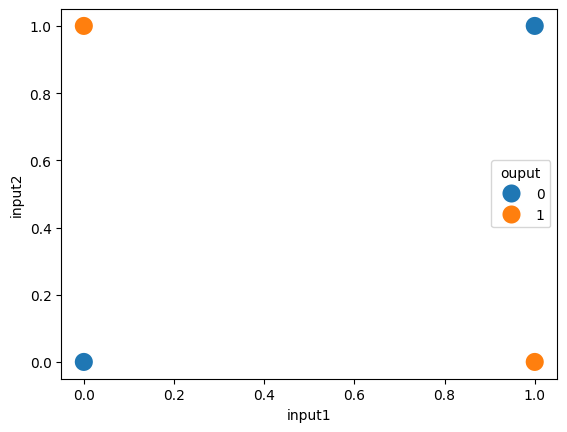

In [79]:
sns.scatterplot(x=and_data['input1'], y=and_data['input2'], hue=xor_data['ouput'],s=200)

In [57]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [58]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [59]:
clf1.coef_

array([[2., 2.]])

In [60]:
clf1.intercept_

array([-2.])

In [61]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

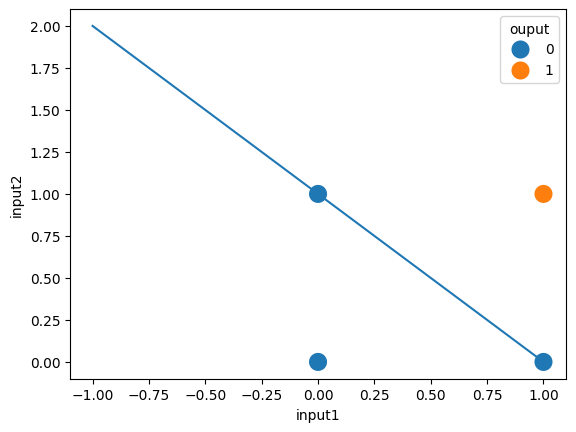

In [65]:
plt.plot(x,y)
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

In [66]:
clf2.coef_

array([[2., 2.]])

In [67]:
clf2.intercept_

array([-1.])

In [68]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

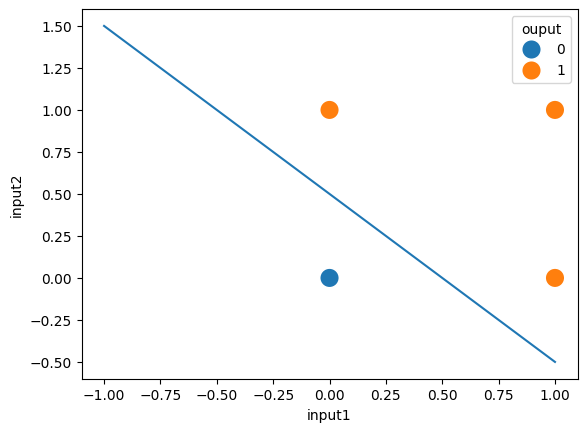

In [70]:
plt.plot(x1,y1)
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

In [71]:
clf3.coef_

array([[0., 0.]])

In [72]:
clf3.intercept_

array([0.])

In [75]:
!pip install mlxtend

In [76]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

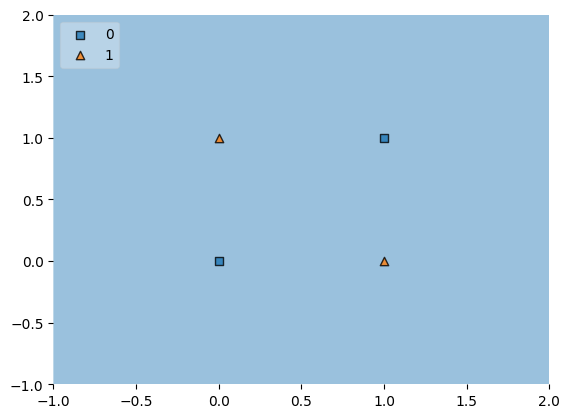

In [78]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)